## Week 2 Exercise

**Assignment**: This exercise will use a live, publicly accessable API to collect multiple categories of data in order to conduct analyses and create visulizations.  Spefically, you will:
  
* Collect data from a public website
* Read data into dataframes
* Develop a research question(s)
* Inform that research question with visualizations
* Inform that research question with basic statistics
* Provide a short write up of your analysis
* Generalize this analysis to "big data"

For this exercise, you will have to complete all the tasks within this notebook, save the entire notebook, and then upload into the Week 2 Assignment for your group on BlackBoard. Save this notebook with a new name with the following format:

**Week_2_Exercise_Group_group_number.ipynb**

These in-class exercises are designed to allow you to explore Python with your group and **DO NOT** include step-by-step directions or answers that have only one possibility. Use your team and other resources to determine how best to complete them. Make sure before you turn in your notebook that it runs without errors and the requested output is visible in the notebook. If you go through multiple steps in your code, make sure all those steps are included so that we can evaluate your work.

## Basketball Statistics

For this exercise, we are going to use the National Basketball Association's statitics site. We will be using a Python library called [requests](http://docs.python-requests.org/en/latest/) to send a URL to their http://stats.nba.com site to query it for player shot data. Requests makes it easy to do "web scaping" like this. The data returned from the website is JSON, but we will reading that JSON into a pandas dataframe for analysis.

In order to make the retreival of the data easier, we have written a function that will return the shot statistics for any player for the 2014-2015 season. You have already been using simple functions like <code>type</code> and <code>id</code>, but in this case we are writing our own. Once you run the code in the cell below, the function <code>get_shot_stats</code> will be available for you to use just as any other Python function. Our function has one input parameter which is the NBA's player id.

Run the code in the following block to make the function available for use in the notebook namespace.

In [ ]:
import requests
import pandas as pd

def get_shot_stats(player_id):
    """
    Return a dataframe of player shot statistics from the NBA API.
    
    Keyword arguments:
    player_id: the integer player id from http://stats.nba.com
    """

    shot_chart_url = 'http://stats.nba.com/stats/shotchartdetail?CFID=33&CFPAR'\
                    'AMS=2014-15&ContextFilter=&ContextMeasure=FGA&DateFrom=&D'\
                    'ateTo=&GameID=&GameSegment=&LastNGames=0&LeagueID=00&Loca'\
                    'tion=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&'\
                    'PaceAdjust=N&PerMode=PerGame&Period=0&PlayerID={}&Plu'\
                    'sMinus=N&Position=&Rank=N&RookieYear=&Season=2014-15&Seas'\
                    'onSegment=&SeasonType=Regular+Season&TeamID=0&VsConferenc'\
                    'e=&VsDivision=&mode=Advanced&showDetails=0&showShots=1&sh'\
                    'owZones=0'.format(player_id)
                    
    response = requests.get(shot_chart_url)
    headers = response.json()['resultSets'][0]['headers']
    shots = response.json()['resultSets'][0]['rowSet']
    shot_df = pd.DataFrame(shots, columns=headers)
    
    return shot_df

Now, let's use the function to collect data for Phoenix Sun's player Brandon Knight. We happen to know Brandon Knight's id number is 202688.

In [ ]:
# Assign Brandon's id to a variable.
brandon = 202688

# Use our fucntion to get Brandon's stats and assign the returned dataframe to var.
brandon_shots = get_shot_stats(brandon)

# Print the dataframe to make sure it worked.
print brandon_shots

With larger dataframe like this, returning the columns attribute via <code>df.columns</code> is a convienent way to see the column names without printing the entire dataframe. 

Using your knowledge of data selection, indexing, boolean masks, and the dataframe function <code>.sum()</code>, print out the number of baskets Brandon made both playing for the Suns and the Bucks.

In [ ]:
# CODING TASK #1
# Print the number of baskets Brandon made as a Sun.

# Print the number of baskets Brandon made as a Buck.


The pandas selection and statistics functions offer a powerful tool to explore datasets like the one we collected from the NBA. Let's give you one more tool before we continue- visualization.

In the next code block we are going to import a function that allows us to visualize Brandon's shots on a basketball court. Specifically, this function draws the court. When you are working with matplotlib plots in Python, you can think of each individual function as drawing a layer and the <code>draw_court</code> function does just that. Run the following code block to see that.

In [ ]:
# Let's read in a helper function for drawing and set up plotting
import matplotlib.pyplot as plt
from draw_court import draw_court
# Thanks to Savvas Tjortjoglou for letting us use his code in our course!
%pylab inline
pylab.rcParams['figure.figsize'] = (10.0, 10.0)

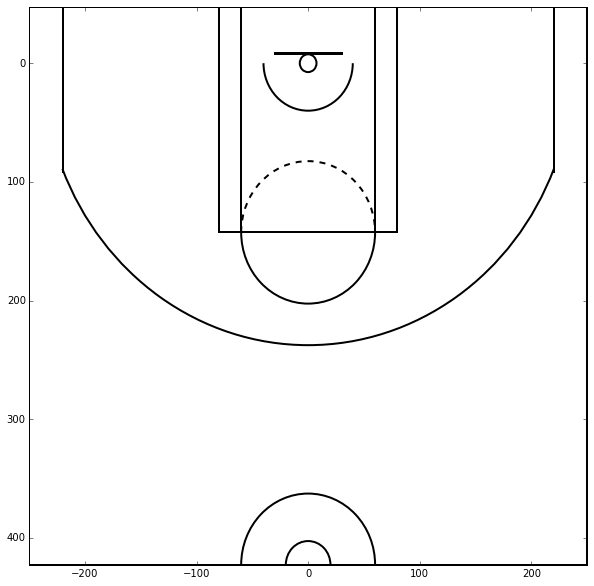

In [13]:
# Call the helper function to draw a court

plt.figure('court')# Begin plotting a figure called court.
draw_court(outer_lines=True)# Call the draw_court function.
plt.xlim(-300,300)# Set the limits of the canvas for the x axis.
plt.ylim(-100,450)# Set the limits of the canvas for the y axis
plt.show()# Display the figure.

While we will look in more detail at plotting in a future lab, we want to give you one more plotting tool, <code>plt.scatter()</code>.

The <code>plt.scatter()</code> allows you to create a scatter plot by passing in a matrix of x and y coordinates. Detailed documentation is here:

* http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter

The code in the follow code block is a simple example of this using random data.

In [ ]:
import numpy as np# Import NumPy to generate random numbers

plt.figure('scatter')# Begin plotting a figure called scatter.
x = np.random.rand(5000)# Generate 5000 random points for the x axis.
y = np.random.rand(5000)# Generate a corresponding 5000 points for the y axis.
plt.xlim(0,1)# Set the limits of the canvas for the x axis.
plt.ylim(0,1)# Set the limits of the canvas for the y axis.
plt.scatter(x,y, alpha=.5)# Plot the points with alpha value to make semi-transparent.
plt.show()# Show the plot in the notebook.

Finally, if you want to generate dataframes for other players than Brandon, you can lookup player numbers at http://stats.nba.com/. Player numbers appear in the page query parameters as shown below:

<img src="https://raw.githubusercontent.com/azbones/big_data/master/images/brandon.png">

## Written Response 1:
_(Enter Your Response in This Cell)_

Develop and enter a research question in this markdown box that you can explore with the NBA data, dataframe functions, and plotting. 

Specically, use scatter plots to plot player shot selection on the pyplot court image. Try to make the research question more interesting by exploring something beyond just shot selection for a single player across the whole season across the whole game.





In [ ]:
# CODING TASK #2

# Write the code to collect the data to inform your research question.



In [ ]:
# CODING TASK #3

# Write code to present visualizations that inform your research question.


In [ ]:
# CODING TASK #4

# Write code to generate some basic statistics (like sum() or average()) to inform your research question.



## Written Response 2:
_(Enter Your Response in This Cell)_

Provide a short write up of what your analysis revealed. 

## Written Response 3:
_(Enter Your Response in This Cell)_

* How might data available from public websites be part of a "big data" strategy?
* What might some of the challenges of this approach be?




## BONUS LEVEL

Determine a method to validate that the orientation of the plot is appropriate for the data.

## Bonus Response 1:
_(Enter Your Response in This Cell)_

* How did you validate the data was being correctly presented?
* What did you find in your validation?


In [ ]:
# BONUS CODING TASK #1

# Include any code to validate the data and 

